<a href="https://colab.research.google.com/github/quarcs-lab/pysal-tutorials/blob/master/giddy_space_time_withDetails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space-time visualisations (giddy)

## Install libraries

In [0]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q mapclassify
!pip install -q splot
!pip install -q legendgram
!pip install -q esda
!pip install -q inequality
!pip install -q giddy
!pip install -q ipywidgets 

## Load libraries

In [0]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from libpysal.weights.contiguity import Queen
from libpysal import examples

from giddy.directional import Rose

import splot
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

import esda
from esda.moran import Moran
from esda.moran import Moran_Local
from esda.moran import Moran_BV, Moran_Local_BV


from ipywidgets import interact, fixed
import ipywidgets as widgets

from scipy.stats.kde import gaussian_kde

import os

#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-dark')
#plt.style.use('bmh')

## Data prepration

### Import datasets

In [0]:
# get csv and shp and merge
shp_link = examples.get_path('us48.shp')
df = gpd.read_file(shp_link)
income_table = pd.read_csv(examples.get_path("usjoin.csv"))

In [4]:
df

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,20.750,34.956,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
1,45.132,34.527,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6..."
2,9.571,18.899,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ..."
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939..."
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9..."
5,27.966,21.987,6,6,Wyoming,56,Mtn,WY,"POLYGON ((-104.05311 41.69825, -104.05499 41.5..."
6,16.477,21.891,7,7,Wisconsin,55,E N Cen,WI,"MULTIPOLYGON (((-87.74845 44.96163, -87.83989 ..."
7,24.391,28.529,8,8,Idaho,16,Mtn,ID,"POLYGON ((-117.02531 43.67915, -117.02280 43.7..."
8,2.794,8.450,9,9,Vermont,50,N Eng,VT,"POLYGON ((-73.25851 42.74598, -73.26972 42.747..."
9,25.577,29.510,10,10,Minnesota,27,W N Cen,MN,"POLYGON ((-91.73022 43.49960, -92.07737 43.499..."


In [5]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [6]:
income_table

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,267,244,252,281,375,518,658,738,784,754,805,881,833,909,1045,1106,1161,1139,1273,1356,1421,1468,1526,1558,1587,1667,1758,1890,2030,2169,...,2979,3225,3544,3960,4351,4765,5323,5817,6500,7199,7892,8712,9185,9783,10800,11583,12202,12912,13842,14899,15832,16536,17462,17991,18860,19683,20329,21129,22123,22987,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,504,478,490,505,638,917,1004,1050,1124,1117,1186,1324,1305,1367,1623,1716,1716,1696,1752,1850,1893,1885,1974,2059,2103,2167,2204,2310,2412,2587,...,3843,4145,4487,4929,5329,5528,6074,6642,7586,8604,9590,10658,10945,11654,12885,13808,14463,15130,15795,16568,17211,17563,18131,18756,19774,20634,21611,22781,24133,25189,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,256,231,249,260,342,481,559,687,740,756,741,886,813,847,957,1027,1066,1074,1176,1230,1244,1314,1412,1405,1511,1574,1656,1777,1886,2094,...,2849,3096,3415,3985,4376,4655,5155,5670,6509,7088,7586,8564,8952,9476,10560,11264,11734,12184,13016,13813,14509,15255,16425,16995,17750,18546,19442,20229,21260,22244,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,795,771,781,844,1013,1286,1549,1583,1583,1671,1693,1763,1744,1877,2080,2207,2249,2227,2379,2495,2579,2596,2740,2823,2880,3004,3102,3274,3417,3663,...,4815,5034,5451,5947,6553,7091,7815,8570,9618,10846,12029,13205,13774,14491,15927,16909,17628,18625,19713,20765,21889,22024,22722,22927,23473,24496,25563,26759,28280,29910,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,532,506,516,545,649,895,1039,1065,1189,1211,1359,1454,1430,1521,1796,1880,1813,1773,1869,1960,2104,2157,2261,2340,2417,2471,2539,2638,2800,2982,...,4055,4413,4791,5310,5864,6321,6895,7567,8539,9596,10809,12141,12945,13570,14751,15416,15772,16417,17285,18548,19703,20487,21447,22526,23498,24865,26231,27950,29860,31546,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093
5,Connecticut,9,1024,921,801,620,583,653,706,806,860,769,836,918,1145,1418,1593,1599,1565,1580,1702,1720,1663,1891,2158,2298,2393,2350,2477,2684,2810,2731,2832,2926,3042,3175,3250,3401,3583,3874,...,5090,5300,5697,6241,6813,7239,7885,8712,9720,10971,12439,13865,14903,15799,17580,18763,20038,21895,24007,25797,26736,26863,28635,29602,30532,31947,33472,35596,37452,39300,40640,42279,42021,42398,45009,47022,51133,53930,54528,52736
6,Delaware,10,1032,857,775,590,564,645,701,868,949,795,899,1027,1164,1291,1464,1504,1526,1565,1664,1685,1805,2075,2155,2244,2341,2306,2507,2749,2645,2651,2724,2805,2815,2933,3049,3210,3468,3610,...,4608,4892,5303,5871,6347,6729,7349,7913,8658,9549,10803,11873,12727,13529,14816,16056,16781,17933,19312,20930,21636,22342,23094,23823,24530,25391,26640,27405,29571,30778,31255,32664,33463,34123,35998,37297,39358,40251,40698,40135
7,Florida,12,518,470,398,319,288,348,376,450,487,460,495,522,609,787,1009,1114,1174,1169,1167,1201,1208,1304,1388,1474,1567,1562,1673,1791,1836,1887,2010,2023,2039,2113,2200,2348,2498,2685,...,4006,4286,4703,5235,5616,5895,6376,7010,7921,8879,10049,11195,11789,12637,13764,14705,15423,16415,17593,19045,19855,20189,20661,21652,22340,23512,24616,25722,26930,27780,28145,28852,29499,30277,32462,34460,36934,37781,37808,36565
8,Georgia,13,347,307,256,200,204,244,268,302,313,290,309,337,419,567,725,831,879,845,887,988,969,1065,1204,1280,1326,1302,1423,1499,1523,1583,1660,1698,1744,1844,1961,2082,2258,2462,...,3394,3666,4038,4497,4867,5152,

In [7]:
type(income_table)

pandas.core.frame.DataFrame

## Time series

In [8]:
incomeValues = income_table.iloc[:,2:]
incomeValues.shape

(48, 81)

In [9]:
Y = np.array(incomeValues.values)
Y.shape

(48, 81)

In [10]:
years = np.arange(1929,2010)
years.shape

(81,)

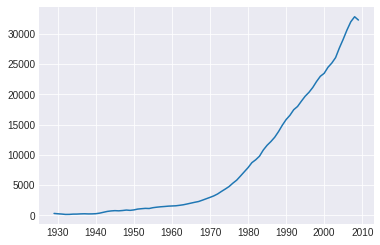

In [11]:
# plot Alabama
plt.plot(years,Y[0])

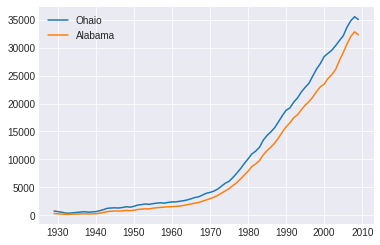

In [12]:
# plot incomes of Ohaio and Alabama
plt.plot(years, Y[32], label='Ohaio')
plt.plot(years, Y[0],  label='Alabama')
plt.legend()

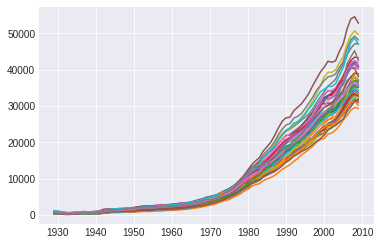

In [13]:
# plot all states (rows)
for row in Y:
    plt.plot(years, row)

### Compute relative values

In [0]:
RY = Y / Y.mean(axis=0)

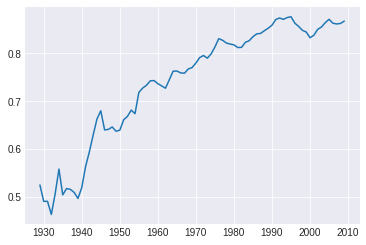

In [15]:
# plot Relative Income of Alabama
plt.plot(years,RY[0])

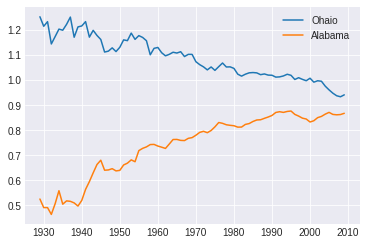

In [16]:
# plot relative incomes of Ohaio and Alabama
plt.plot(years, RY[32], label='Ohaio')
plt.plot(years, RY[0], label='Alabama')
plt.legend()

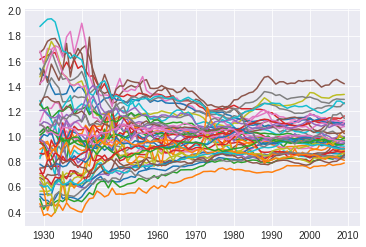

In [17]:
for row in RY:
    plt.plot(years, row)

## Kernel Density (univariate, aspatial)

In [0]:
# Distribution of relative income in 1929
d1929 = gaussian_kde(RY[:,0])

In [0]:
# Distribution of relative income in 2009
d2009 = gaussian_kde(RY[:,-1])

In [0]:
# Define domain of values
minR0 = RY.min()
maxR0 = RY.max()
x = np.linspace(minR0, maxR0, 100)

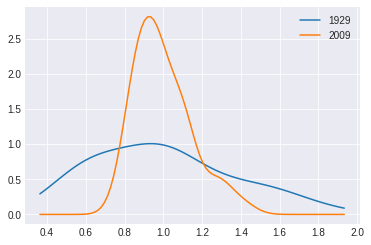

In [21]:
plt.plot(x, d1929(x), label='1929')
plt.plot(x, d2009(x), label='2009')
plt.legend()

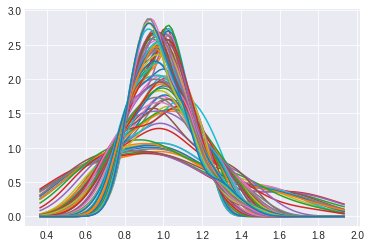

In [22]:
# Plotting all distributions
for cs in RY.T: # take cross sections
    plt.plot(x, gaussian_kde(cs)(x))

### Using seaborn

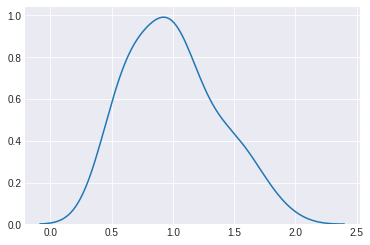

In [23]:
# Distribution of relative income in 1929
sns.kdeplot(RY[:,0])

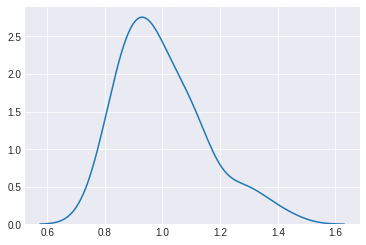

In [24]:
# Distribution of relative income in 2009
sns.kdeplot(RY[:,-1])

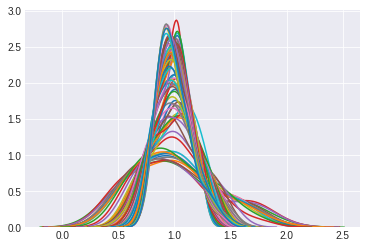

In [25]:
# Plotting all distributions
for y in range(2010-1929):
    sns.kdeplot(RY[:,y])

## Sigma convergence

Text(0.5, 1.0, 'Sigma-Convergence')

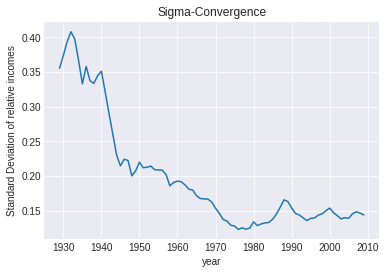

In [26]:
sigma = RY.std(axis=0)
plt.plot(years, sigma)
plt.ylabel('Standard Deviation of relative incomes')
plt.xlabel('year')
plt.title("Sigma-Convergence")

## Markov Chains

## Calculate relative values again

In [0]:
# calculate relative values
for year in range(1969, 2010):
    income_table[str(year) + '_rel'] = income_table[str(year)] / income_table[str(year)].mean()

In [28]:
income_table

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,1970_rel,1971_rel,1972_rel,1973_rel,1974_rel,1975_rel,1976_rel,1977_rel,1978_rel,1979_rel,1980_rel,1981_rel,1982_rel,1983_rel,1984_rel,1985_rel,1986_rel,1987_rel,1988_rel,1989_rel,1990_rel,1991_rel,1992_rel,1993_rel,1994_rel,1995_rel,1996_rel,1997_rel,1998_rel,1999_rel,2000_rel,2001_rel,2002_rel,2003_rel,2004_rel,2005_rel,2006_rel,2007_rel,2008_rel,2009_rel
0,Alabama,1,323,267,224,162,166,211,217,251,267,244,252,281,375,518,658,738,784,754,805,881,833,909,1045,1106,1161,1139,1273,1356,1421,1468,1526,1558,1587,1667,1758,1890,2030,2169,...,0.779856,0.791237,0.795555,0.789995,0.798825,0.813328,0.830737,0.827419,0.821695,0.819436,0.817783,0.812238,0.812541,0.823088,0.826457,0.834818,0.840783,0.841707,0.847372,0.852649,0.858900,0.870834,0.873850,0.871090,0.874870,0.876544,0.863147,0.856376,0.848117,0.844615,0.832717,0.837863,0.850126,0.855097,0.864166,0.871194,0.863026,0.861483,0.862523,0.867464
1,Arizona,4,600,520,429,321,308,362,416,462,504,478,490,505,638,917,1004,1050,1124,1117,1186,1324,1305,1367,1623,1716,1716,1696,1752,1850,1893,1885,1974,2059,2103,2167,2204,2310,2412,2587,...,1.006037,1.016954,1.007239,0.983305,0.978382,0.943563,0.947942,0.944769,0.958981,0.979362,0.993733,0.993668,0.968238,0.980504,0.986009,0.995180,0.996578,0.986294,0.966930,0.948164,0.933712,0.924919,0.907329,0.908130,0.917269,0.918895,0.917579,0.923333,0.925173,0.925524,0.907470,0.898305,0.894320,0.889248,0.898152,0.918321,0.917061,0.901395,0.878975,0.862169
2,Arkansas,5,310,228,215,157,157,187,207,247,256,231,249,260,342,481,559,687,740,756,741,886,813,847,957,1027,1066,1074,1176,1230,1244,1314,1412,1405,1511,1574,1656,1777,1886,2094,...,0.745824,0.759588,0.766597,0.794983,0.803415,0.794552,0.804518,0.806510,0.822833,0.806801,0.786075,0.798440,0.791929,0.797259,0.808091,0.811827,0.808535,0.794250,0.796806,0.790499,0.787126,0.803373,0.821956,0.822865,0.823380,0.825910,0.825486,0.819898,0.815032,0.817315,0.789646,0.805844,0.808500,0.822586,0.826682,0.823737,0.818148,0.836760,0.835742,0.846472
3,California,6,991,887,749,580,546,603,660,771,795,771,781,844,1013,1286,1549,1583,1583,1671,1693,1763,1744,1877,2080,2207,2249,2227,2379,2495,2579,2596,2740,2823,2880,3004,3102,3274,3417,3663,...,1.260492,1.235066,1.223638,1.186390,1.203103,1.210348,1.219653,1.219011,1.215856,1.234561,1.246467,1.231130,1.218502,1.219193,1.218794,1.218678,1.214663,1.214126,1.206780,1.188353,1.187498,1.159848,1.137076,1.110082,1.088856,1.090882,1.085377,1.084564,1.084154,1.098988,1.145069,1.121511,1.111607,1.108886,1.113998,1.121680,1.131648,1.129585,1.113718,1.099368
4,Colorado,8,634,578,471,354,353,368,444,542,532,506,516,545,649,895,1039,1065,1189,1211,1359,1454,1430,1521,1796,1880,1813,1773,1869,1960,2104,2157,2261,2340,2417,2471,2539,2638,2800,2982,...,1.061536,1.082707,1.075481,1.059312,1.076605,1.078918,1.076072,1.076342,1.079454,1.092278,1.120048,1.131931,1.145166,1.141705,1.128802,1.111073,1.086775,1.070191,1.058144,1.061477,1.068905,1.078906,1.073271,1.090666,1.090016,1.107314,1.113739,1.132836,1.144726,1.159100,1.168982,1.172125,1.147523,1.118433,1.110250,1.119435,1.117365,1.108632,1.096425,1.077623
5,Connecticut,9,1024,921,801,620,583,653,706,806,860,769,836,918,1145,1418,1593,1599,1565,1580,1702,1720,1663,1891,2158,2298,2393,2350,2477,2684,2810,2731,2832,2926,3042,3175,3250,3401,3583,3874,...,1.332483,1.300328,1.278860,1.245041,1.250838,1.235610,1.230577,1.239209,1.228750,1.248789,1.288952,1.292663,1.318378,1.329241,1.345288,1.352300,1.380725,1.427291,1.469648,1.476327,1.450452,1.414684,1.432980,1.433272,1.416307,1.422698,1.421184,1.442735,1.435776,1.444007,1.441847,1.447828,1.419782,1.390922,1.405937,1.407886,1.440528,1.452412,1.433061,1.417443
6,Delaware,10,1032,857,775,590,564,645,701,868,949,795,899,1027,1164,1291,1464,1504,1526,1565,1664,1685,1805,2075,2155,2

## Merge datasets

In [0]:
# merge
gdf = df.merge(income_table, left_on = 'STATE_NAME', right_on = 'Name')

In [30]:
gdf

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,STATE_FIPS_y,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,1970_rel,1971_rel,1972_rel,1973_rel,1974_rel,1975_rel,1976_rel,1977_rel,1978_rel,1979_rel,1980_rel,1981_rel,1982_rel,1983_rel,1984_rel,1985_rel,1986_rel,1987_rel,1988_rel,1989_rel,1990_rel,1991_rel,1992_rel,1993_rel,1994_rel,1995_rel,1996_rel,1997_rel,1998_rel,1999_rel,2000_rel,2001_rel,2002_rel,2003_rel,2004_rel,2005_rel,2006_rel,2007_rel,2008_rel,2009_rel
0,20.750,34.956,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",Washington,53,741,658,534,402,376,443,490,569,599,582,614,658,864,1196,1469,1527,1419,1401,1504,1624,1595,1721,1874,1973,2066,2077,2116,2172,2262,...,1.100803,1.074856,1.062012,1.059711,1.086703,1.115104,1.120707,1.114036,1.123446,1.134280,1.130825,1.109742,1.099695,1.104181,1.072940,1.062208,1.069548,1.062564,1.057226,1.068459,1.086428,1.100708,1.096791,1.085243,1.072435,1.063360,1.073658,1.086915,1.097648,1.116699,1.118567,1.097643,1.088158,1.080443,1.092788,1.070032,1.083981,1.098318,1.092982,1.091761
1,45.132,34.527,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",Montana,30,592,501,382,339,298,364,476,475,512,517,533,569,713,901,1150,1183,1206,1308,1484,1642,1412,1654,1806,1823,1810,1771,1894,1929,1983,...,0.948968,0.929612,0.977608,0.999863,0.987745,0.988966,0.967607,0.943915,0.976047,0.944645,0.947414,0.955070,0.944087,0.929266,0.895711,0.857665,0.858905,0.847183,0.817988,0.836854,0.842191,0.869412,0.856435,0.875012,0.840961,0.835618,0.822981,0.817385,0.817486,0.809048,0.800715,0.833583,0.834516,0.851750,0.859543,0.867900,0.871703,0.878638,0.874980,0.878887
2,9.571,18.899,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",Maine,23,601,576,491,377,371,416,430,506,510,471,495,526,631,857,1102,1102,1079,1134,1169,1240,1183,1195,1319,1438,1449,1448,1581,1669,1720,...,0.896088,0.881769,0.867389,0.861614,0.874650,0.856683,0.890822,0.873648,0.853425,0.853356,0.871252,0.860626,0.873404,0.887703,0.892650,0.903287,0.927672,0.951419,0.968032,0.966363,0.948251,0.930133,0.918288,0.910744,0.905996,0.901349,0.904077,0.904040,0.902018,0.903992,0.909066,0.926933,0.936960,0.942427,0.943383,0.919818,0.911088,0.905435,0.917371,0.947937
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",North Dakota,38,382,311,187,176,146,180,272,234,326,282,319,355,529,665,966,1031,1046,1088,1494,1483,1211,1360,1444,1318,1336,1364,1490,1556,1598,...,0.841375,0.900170,0.982547,1.231276,1.123606,1.081137,0.965110,0.914187,1.028509,0.955914,0.838818,0.964207,0.972219,0.957956,0.941778,0.923324,0.904451,0.884275,0.780217,0.821631,0.861504,0.856826,0.885360,0.863295,0.882895,0.849869,0.898685,0.842960,0.872805,0.856594,0.889376,0.894401,0.904490,0.954959,0.926983,0.947454,0.925625,0.966354,1.025203,1.039430
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",South Dakota,46,426,366,241,189,129,184,309,244,323,320,345,361,475,757,846,979,1086,1132,1270,1526,1116,1283,1497,1327,1436,1457,1342,1419,1669,...,0.852370,0.868030,0.912509,1.029986,0.950659,0.967288,0.872563,0.903376,0.928768,0.928595,0.843689,0.881137,0.877120,0.857751,0.889130,0.860692,0.860352,0.861590,0.845230,0.845095,0.880926,0.893216,0.899072,0.898882,0.909522,0.883892,0.922887,0.902824,0.912292,0.920233,0.926522,0.942789,0.936825,0.986551,0.992237,0.979850,0.938697,0.969478,1.003626,0.981024
5,27.966,21.987,6,6,Wyoming,56,Mtn,WY,"POLYGON ((-104.05311 41.69825, -104.05499 41.5...",Wyoming,56,675,585,476,374,371,411,496,551,607,561,587,602,779,944,1150,1224,1258,1362,1506,1610,1647,1719,1955,1912,1932,1858,1913,2011,2132,...,1.025933,1.047377,1.057074,1.079261,1.133153,1.143780,1.125545,1.159554,1.186275,1.203372,1.217867,1.200737,1.172236,1.070443,1.032535,1.

In [31]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

## Spatial analysis

### Create spatial weights and data for two points in time

In [0]:
#retrieve spatial weights and data for two points in time
w = Queen.from_dataframe(gdf)

In [33]:
w

In [0]:
w.transform = 'r'

In [0]:
y1 = gdf['1969_rel'].values
y2 = gdf['2000_rel'].values

In [36]:
y1 # This is a raw vector

array([1.14848363, 0.92058097, 0.88021445, 0.85554602, 0.8395676 ,
       1.00467789, 1.05149184, 0.91637612, 0.94973457, 1.05934089,
       1.03074794, 1.04952958, 1.02373986, 1.17931917, 1.00131401,
       1.2903271 , 1.06943252, 1.35872593, 1.08344867, 1.2684619 ,
       1.04111989, 1.26706029, 0.86984249, 1.27266675, 1.10279097,
       1.22052666, 1.2393083 , 0.78434396, 1.17987981, 1.03327084,
       0.83283985, 0.99458626, 0.99738949, 0.99823046, 0.9780472 ,
       0.89647319, 0.85526569, 0.83171856, 0.94552972, 0.81882369,
       0.7703278 , 0.67501796, 0.88638155, 0.79247333, 0.73416613,
       0.81321723, 1.02570212, 1.16193913])

### Global spatial autocorrelation

In [37]:
moranY1 = Moran(y1, w)
moranY1.I

0.4694254433969317

In [38]:
moranY2 = Moran(y2, w)
moranY2.I

0.34395743331461265

Our value for the statistic is interpreted against a reference distribution under the null hypothesis of complete spatial randomness. PySAL uses the approach of random spatial permutations.

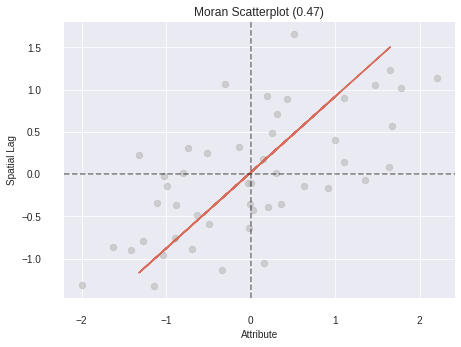

In [39]:
fig, ax = moran_scatterplot(moranY1, aspect_equal=True)
plt.show()

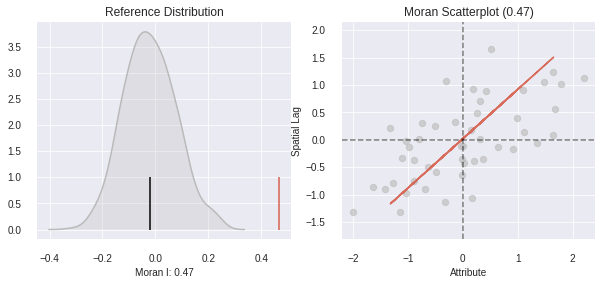

In [40]:
plot_moran(moranY1, zstandard=True, figsize=(10,4))
plt.show()

In [41]:
moranY1.p_sim

0.001

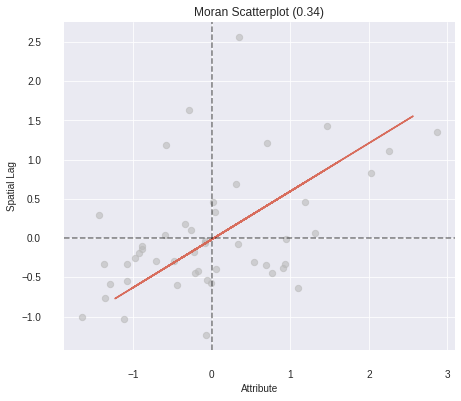

In [42]:
fig, ax = moran_scatterplot(moranY2, aspect_equal=True)
plt.show()

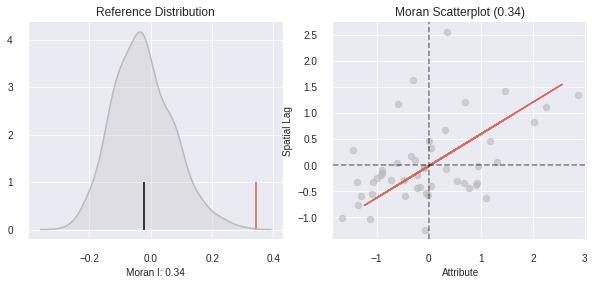

In [43]:
plot_moran(moranY2, zstandard=True, figsize=(10,4))
plt.show()

In [44]:
moranY2.p_sim

0.001

### Local spatial autocorrelation

#### For the initial year

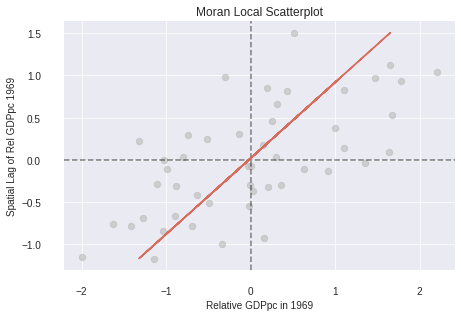

In [45]:
moran_loc1 = Moran_Local(y1, w)
fig, ax = moran_scatterplot(moran_loc1)
ax.set_xlabel('Relative GDPpc in 1969')
ax.set_ylabel('Spatial Lag of Rel GDPpc 1969')
plt.show()

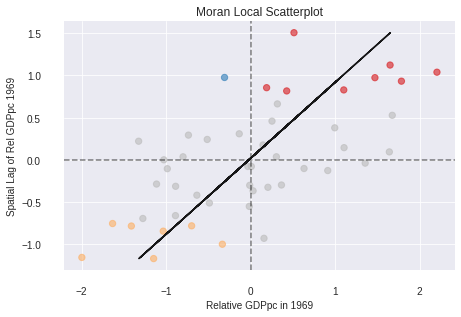

In [46]:
fig, ax = moran_scatterplot(moran_loc1, p=0.05)
ax.set_xlabel('Relative GDPpc in 1969')
ax.set_ylabel('Spatial Lag of Rel GDPpc 1969')
plt.show()

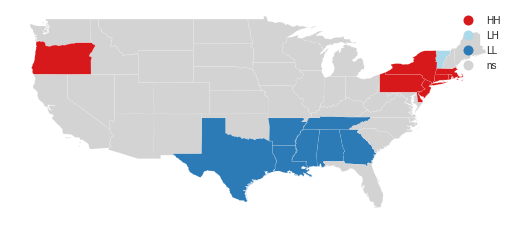

In [47]:
lisa_cluster(moran_loc1, gdf, p=0.05, figsize = (9,9))
plt.show()

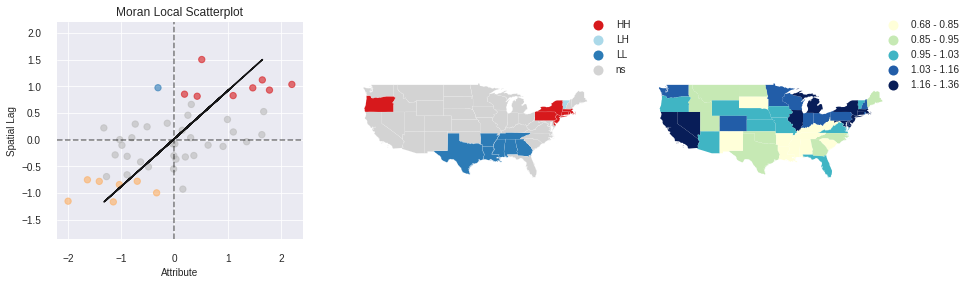

In [48]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc1, gdf, "1969_rel")
plt.show()

#### For the final year

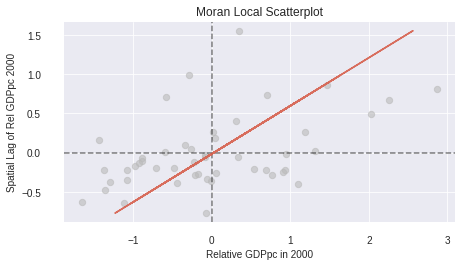

In [49]:
moran_loc2 = Moran_Local(y2, w)
fig, ax = moran_scatterplot(moran_loc2)
ax.set_xlabel('Relative GDPpc in 2000')
ax.set_ylabel('Spatial Lag of Rel GDPpc 2000')
plt.show()

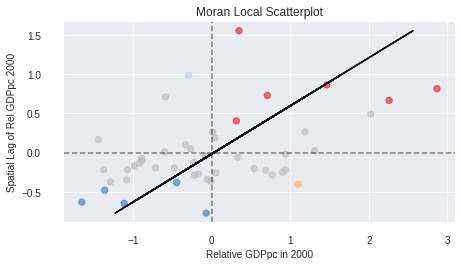

In [50]:
fig, ax = moran_scatterplot(moran_loc2, p=0.05)
ax.set_xlabel('Relative GDPpc in 2000')
ax.set_ylabel('Spatial Lag of Rel GDPpc 2000')
plt.show()

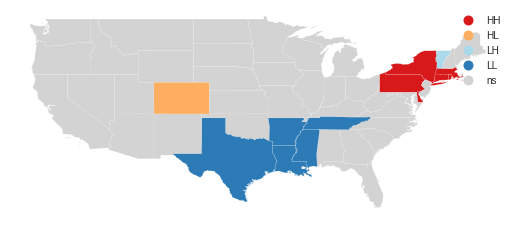

In [51]:
lisa_cluster(moran_loc2, gdf, p=0.05, figsize = (9,9))
plt.show()

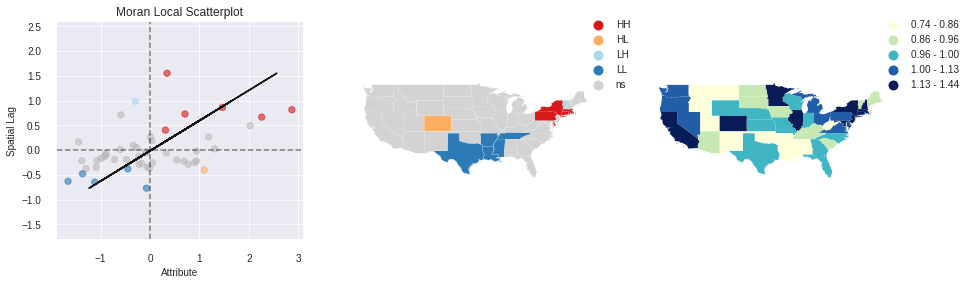

In [52]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc2, gdf, "2000_rel")
plt.show()

### Create rose object

In [0]:
# create rose object
Y = np.array([y1, y2]).T
rose = Rose(Y, w, k=5)

In [54]:
Y

array([[1.14848363, 1.11856702],
       [0.92058097, 0.80071489],
       [0.88021445, 0.90906632],
       [0.85554602, 0.88937573],
       [0.8395676 , 0.92652175],
       [1.00467789, 0.96608031],
       [1.05149184, 1.00162979],
       [0.91637612, 0.8578708 ],
       [0.94973457, 0.95440787],
       [1.05934089, 1.13889622],
       [1.03074794, 1.00581626],
       [1.04952958, 1.18257029],
       [1.02373986, 0.9480927 ],
       [1.17931917, 1.34790023],
       [1.00131401, 0.98733195],
       [1.2903271 , 1.2256767 ],
       [1.06943252, 1.04800023],
       [1.35872593, 1.44184737],
       [1.08344867, 1.0531801 ],
       [1.2684619 , 1.31210239],
       [1.04111989, 0.95831051],
       [1.26706029, 1.08312397],
       [0.86984249, 0.84818516],
       [1.27266675, 1.14506948],
       [1.10279097, 1.00759019],
       [1.22052666, 1.14450183],
       [1.2393083 , 1.10888138],
       [0.78434396, 0.77751194],
       [1.17987981, 1.20172869],
       [1.03327084, 1.16898201],
       [0.

In [55]:
rose

### Calculate Local Moran

In [0]:
# calculate Moran_Local
moran_loc1 = esda.moran.Moran_Local(y1, w)
moran_loc2 = esda.moran.Moran_Local(y2, w)

In [57]:
moran_loc1

## Plotting dynamic lisas

In [0]:
from splot.giddy import (dynamic_lisa_heatmap,
                         dynamic_lisa_rose,
                         dynamic_lisa_vectors,
                         dynamic_lisa_composite,
                         dynamic_lisa_composite_explore)
import splot

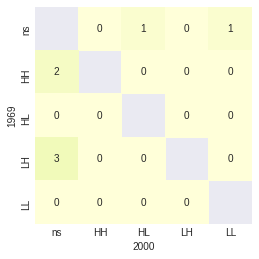

In [59]:
fig, ax = dynamic_lisa_heatmap(rose)
ax.set_ylabel(1969)
ax.set_xlabel(2000)
plt.show()

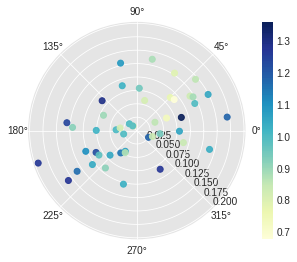

In [60]:
fig, ax = dynamic_lisa_rose(rose, attribute=y1)
plt.show()

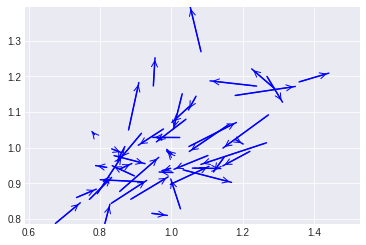

In [61]:
fig, ax = dynamic_lisa_vectors(rose)

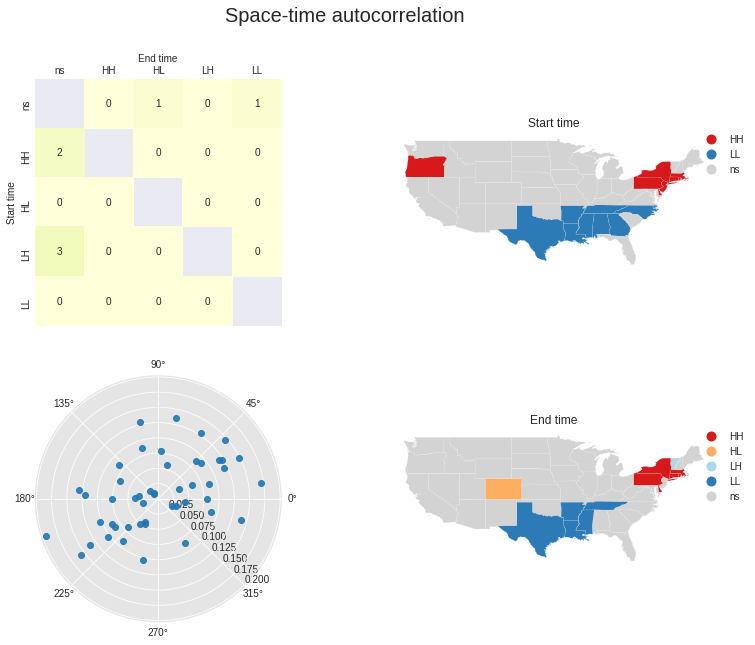

In [62]:
dynamic_lisa_composite(rose, gdf)
plt.show()

In [63]:
dynamic_lisa_composite_explore(rose, gdf, pattern='rel')
plt.show()

interactive(children=(Dropdown(description='start_time', options={'1969_rel': '1969_rel', '1970_rel': '1970_re…